In [ ]:
import pandas as pd
import numpy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_activites = pd.read_csv(r"C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_IDs_with_valid_dist_and_atleast_one_Activity_witg_train_and_rail.csv")

In [ ]:
df_activites.rename(columns={'Activity trace':'Activity_trace_with_road_journey'}, inplace=True)

In [334]:
# df_activites[df_activites['road_activity'].notna()]
df_activites.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon',
       'Activity_trace_with_road_journey', 'name_airport_boundary',
       'name_rail', 'dist_to_rail(m)', 'name_airport_point',
       'dist_to_airport(m)', 'train_activity', 'flight_activity',
       'Activity_trace_old', 'place_name'],
      dtype='object')

In [ ]:
df_activites.drop(columns = 'Unnamed: 0', inplace=True)

In [ ]:
pd.set_option('display.max_columns', 100)  # Adjust the number as needed

In [ ]:

# Replace 'travelling by road' in 'Activity_trace_with_road_journey' with None
# Replace values in 'Activity_trace_with_road_journey' that start with 'travelling by road'
df_activites['Activity_trace_with_road_journey'] = df_activites['Activity_trace_with_road_journey'].apply(
    lambda x: None if pd.notna(x) and x.startswith('travelling') else x
)

# Initialize new columns
df_activites['Activity_trace'] = None
df_activites['place_name'] = None

In [ ]:
df_activites['Activity_trace_with_road_journey'].unique()

In [ ]:
df_activites.reset_index(drop=True)

In [ ]:
df_activites.to_csv(r"C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_IDs_with_valid_dist_and_atleast_one_Activity_with_train_rail_airport_complete.csv", index=False)

In [ ]:
# df_activites= pd.read_csv(r"C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\df_IDs_with_valid_dist_and_atleast_one_Activity_with_train_rail_airport_without_zeroes.csv")


In [406]:
df_activites['highway'].unique()

array(['trunk', 'residential', 'tertiary', 'primary', 'secondary'],
      dtype=object)

In [407]:
df_activites['road_activity'] = None

In [410]:
import pandas as pd

# Sample DataFrame
# df_activites = pd.DataFrame({...})

# # Update 'road_activity' based on conditions
# df_activites.loc[
#     ((df_activites['highway'] == 'primary') & (df_activites['distance_to_road(metres)'] < 25)) |
#     ((df_activites['highway'].isin(['secondary', 'trunk']) & (df_activites['distance_to_road(metres)'] < 12))) |
#     ((df_activites['highway'].isin(['tertiary', 'residential'])) & (df_activites['distance_to_road(metres)'] < 2)),
#     'road_activity'
# ] = 'Road'

# Print the updated DataFrame to verify results
# print(df_activites[df_activites['road_activity'].notna()]['highway', 'distance_to_road(metres)', 'road_activity'])
df_activites[df_activites['road_activity'].notna()][['highway', 'distance_to_road(metres)', 'road_activity']]


highway  distance_to_road(metres) road_activity
155         trunk                  1.236486          Road
156         trunk                  1.236486          Road
199      tertiary                  0.115441          Road
318         trunk                 10.268385          Road
319         trunk                 10.268385          Road
...           ...                       ...           ...
2794471  tertiary                  1.980541          Road
2794502   primary                  2.087235          Road
2794509  tertiary                  1.980541          Road
2794516   primary                 13.964699          Road
2794517   primary                 13.964699          Road

[471174 rows x 3 columns]

In [ ]:
# df_activites['road_activity']=  df_activites['road_activity'].apply(lambda x : 'Road' if pd.notna(x) else x)
# df_activites['road_activity'].unique()

In [411]:
df_activites['Activity_polygon'].unique()

array([nan, 'national_park', 'unspecified', 'forest', 'residential',
       'hospital', 'school', 0], dtype=object)

In [350]:
df_activites[df_activites['Activity_trace'].isna()].count()

maid                                2438928
datetime                            2438928
latitude                            2438928
longitude                           2438928
displacement                        2438928
distance                            2438928
Velocity                            2438928
state                               2438928
district                            2438928
highway                             2438928
name_en_left                          16744
ref_old                              258608
ref                                  426859
int_ref                               20822
distance_to_road(metres)            2438928
road_activity                             0
distance_from_location(m)           2438928
name_point_shp                      2174745
Activity_point_shp                    25323
All_activities_point_shp              25360
geometry                            2438928
name_polygon                          57650
All_activities_polygon          

In [414]:
# df_activites.rename(columns={'Activity_trace':'Activity_trace_old'})
# Identify and rename the second occurrence of 'B'
columns = df_activites.columns.tolist()
# Find the index of the second 'B'
second_occurrence_index = columns.index('Activity_trace_old', columns.index('Activity_trace_old') + 1)

# Rename the second 'Activity_trace_old' column
columns[second_occurrence_index] = 'Activity_trace_bkp'

# Apply the new column names to the DataFrame
df_activites.columns = columns

In [416]:
df_activites.drop(columns = 'Activity_trace', inplace=True)

In [417]:
import pandas as pd
from tqdm import tqdm

# Ensure tqdm works with pandas
tqdm.pandas()

# Define chunk size
chunk_size = 500000

# Initialize columns
df_activites['Activity_trace'] = None
df_activites['place_name'] = None

# Function to process each chunk step-by-step
def process_chunk(chunk_df):
    # Step 1: Update 'Activity_trace' based on 'Activity_point_shp' if 'distance_from_location(m)' < 20
    condition1 = (chunk_df['distance_from_location(m)'] < 20) & (chunk_df['Activity_point_shp'].notna())
    chunk_df.loc[condition1, 'Activity_trace'] = chunk_df.loc[condition1, 'Activity_point_shp']

    # Step 2: Record indices where 'Activity_trace' is not None (updated_indices) and where it's None (un_updated_indices)
    updated_indices = chunk_df[chunk_df['Activity_trace'].notna()].index
    un_updated_indices = chunk_df[chunk_df['Activity_trace'].isna()].index

    # Step 3: Update 'place_name' for updated_indices using 'name_point_shp'
    chunk_df.loc[updated_indices, 'place_name'] = chunk_df.loc[updated_indices, 'name_point_shp']

    # Step 4: For un_updated_indices, update 'Activity_trace' based on 'road_activity'
    chunk_df.loc[un_updated_indices, 'Activity_trace'] = chunk_df.loc[un_updated_indices, 'road_activity'].where(
        chunk_df.loc[un_updated_indices, 'road_activity'].notna()
    )

    # Step 5: Out of the previous un_updated_indices, find those that are now updated
    newly_updated_indices = chunk_df.loc[un_updated_indices, 'Activity_trace'].notna()
    updated_indices = un_updated_indices[newly_updated_indices]
    un_updated_indices = un_updated_indices[~newly_updated_indices]

    # Step 6: Update 'place_name' for updated_indices
    chunk_df.loc[updated_indices, 'place_name'] = chunk_df.loc[updated_indices, 'ref'].where(
        chunk_df.loc[updated_indices, 'ref'].notna(),
        chunk_df.loc[updated_indices, 'ref_old'].where(
            chunk_df.loc[updated_indices, 'ref_old'].notna(),
            chunk_df.loc[updated_indices, 'highway']
        )
    )

    # Step 7: For remaining un_updated_indices, update 'Activity_trace' based on 'train_activity'
    chunk_df.loc[un_updated_indices, 'Activity_trace'] = chunk_df.loc[un_updated_indices, 'train_activity'].where(
        chunk_df.loc[un_updated_indices, 'train_activity'].notna()
    )

    # Step 8: Repeat Step 5 for train activity
    newly_updated_indices = chunk_df.loc[un_updated_indices, 'Activity_trace'].notna()
    updated_indices = un_updated_indices[newly_updated_indices]
    un_updated_indices = un_updated_indices[~newly_updated_indices]

    # Update 'place_name' using 'name_rail' for updated_indices
    chunk_df.loc[updated_indices, 'place_name'] = chunk_df.loc[updated_indices, 'name_rail']

    # Step 9: For remaining un_updated_indices, update 'Activity_trace' based on 'Activity_polygon'
    chunk_df.loc[un_updated_indices, 'Activity_trace'] = chunk_df.loc[un_updated_indices, 'Activity_polygon'].where(
        chunk_df.loc[un_updated_indices, 'Activity_polygon'].notna()
    )

    # Repeat Step 5 for Activity_polygon
    newly_updated_indices = chunk_df.loc[un_updated_indices, 'Activity_trace'].notna()
    updated_indices = un_updated_indices[newly_updated_indices]
    un_updated_indices = un_updated_indices[~newly_updated_indices]

    # Update 'place_name' using 'name_polygon' for updated_indices
    chunk_df.loc[updated_indices, 'place_name'] = chunk_df.loc[updated_indices, 'name_polygon']

    # Step 10: For remaining un_updated_indices, update 'Activity_trace' based on 'flight_activity'
    chunk_df.loc[un_updated_indices, 'Activity_trace'] = chunk_df.loc[un_updated_indices, 'flight_activity'].where(
        chunk_df.loc[un_updated_indices, 'flight_activity'].notna()
    )

    # Repeat Step 5 for flight activity
    newly_updated_indices = chunk_df.loc[un_updated_indices, 'Activity_trace'].notna()
    updated_indices = un_updated_indices[newly_updated_indices]

    # Step 11: Update 'place_name' using 'name_airport' for updated_indices
    chunk_df.loc[updated_indices, 'place_name'] = chunk_df.loc[updated_indices, 'name_airport_point']

    return chunk_df

# Process DataFrame in chunks and update
num_chunks = (len(df_activites) + chunk_size - 1) // chunk_size

for i in tqdm(range(num_chunks), desc='Processing Chunks'):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(df_activites))
    chunk_df = df_activites.iloc[start_idx:end_idx]
    
    processed_chunk = process_chunk(chunk_df)
    
    # Update the main DataFrame with processed chunk
    df_activites.update(processed_chunk)

# Print the updated DataFrame to verify results
# print(df_activites)


Processing Chunks: 100%|██████████| 6/6 [00:19<00:00,  3.28s/it]


In [337]:
df_activites['Activity_trace'].unique()

array([nan, 'Road', 'Train', 'national_park', 'Guest House',
       'Historic Site', 'Flight', 'Residential', 'Tourist Attraction',
       'Fitness Centre', 'Healthcare Services', 'Art', 'unspecified',
       'forest', 'Place of Worship', 'residential', 'Clinic',
       'Administrative', 'Park', 'Hotel', 'Forestry Government Services',
       'Marketplace', 'Sports Ground', 'Entry Point', 'hospital',
       'school', 'Building', 'Commercial', 'Natural Feature',
       'Wellness Centre', 'Fitness Equipment', 'Restaurant',
       'Cultural Monument', 'Museum', 'Camp Site', 'Ecopark',
       'Educational Institution', 0], dtype=object)

In [351]:
# df_activites['name_rail'].replace('0', None, inplace=True)
df_activites['place_name'].nunique()


218

In [ ]:
columns_to_check = ['wikipedia', 'operator', 'type', 'icao', 'iata', 'wikidata', 'name', 'alt_name' ]

# Prepare a dictionary to hold the unique values
unique_values = {}

# Extract unique values for each column
for column in columns_to_check:
    unique_values[column] = uk_airports[column].unique()

# Write unique values to a text file
with open(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_in_uk_airport_boundary.txt', 'w') as file:
    for column, values in unique_values.items():
        file.write(f"Unique values in column '{column}':\n")
        for value in values:
            file.write(f"{value}\n")
        file.write("\n")  # Add a newline for separation between columns

In [418]:
df_activites['Activity_trace'].nunique()

37

In [ ]:
df_activites[(1) & (df_activites['place_name']=='Gurukul Kangri Ayurvedic College & Hospital')].head(10)

In [ ]:
df_activites.columns

In [443]:

# Ensure 'maid' is treated as unique IDs
unique_ids = df_activites['maid']
# Count unique IDs per place
place_counts = df_activites.groupby(['place_name','Activity_trace_latest_orig_bkp','district'])['maid'].nunique().reset_index()

# Rename columns for clarity
place_counts.columns = ['place_name','Activity_trace_latest_orig_bkp', 'district', 'Unique_ID_Count']

place_counts.rename(columns={'Activity_trace_latest_orig_bkp' : 'Activity_trace'})
# Sort the result in decreasing order of unique ID counts
sorted_place_counts = place_counts.sort_values(by=['district', 'Unique_ID_Count'], ascending=False)

# print(sorted_place_counts)
sorted_place_counts

place_name Activity_trace_latest_orig_bkp    district  \
161                       NH34                           Road  Uttarkashi   
143                      NH134                           Road  Uttarkashi   
166                      NH507                           Road  Uttarkashi   
352                   tertiary                           Road  Uttarkashi   
64      Gangotri National Park                  national_park  Uttarkashi   
..                         ...                            ...         ...   
247                      SH 57                           Road      Almora   
251                      SH 59                           Road      Almora   
0                            0                              0      Almora   
202  Physiotherapy Care Clinic                         Clinic      Almora   
269                       SH37                           Road      Almora   

     Unique_ID_Count  
161              254  
143              165  
166              127  
352               97  
64                94  
..               ...  
247                7  
251                4  
0                  3  
202                3  
269                1  

[362 rows x 4 columns]

In [ ]:
sorted_place_counts.iloc[408]

In [444]:
sorted_place_counts.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Counts_of_IDs_visiting_different_places_25082024.csv', index=False)


In [ ]:
sorted_place_counts.iloc[203]

In [ ]:
df_activites[df_activites['Activity_trace']=='Entry Point'].to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\special cases\entry_point_activity.csv', index=False)

In [ ]:
df_activites.iloc[42472:42473] #.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\special cases\Art_in_haridwar.csv', index=False)

In [ ]:
df_activites[(df_activites['Activity_trace_old']=='Art') & (df_activites['district']=='Haridwar')]

In [445]:
correct_activity_place_name_pairs = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Counts_of_IDs_visiting_different_places_25082024_manually_edited.csv')

In [452]:
correct_activity_place_name_pairs = correct_activity_place_name_pairs[correct_activity_place_name_pairs['place_name'].notna()]

In [458]:
correct_activity_place_name_pairs.shape

(348, 3)

In [ ]:
correct_activity_place_name_pairs.shape

In [ ]:
correct_activity_place_name_pairs.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Counts_of_IDs_with_correct_activity_place_name_pairs.csv', index=False)

In [455]:
correct_activity_place_name_pairs = correct_activity_place_name_pairs[['place_name', 'Activity_trace_latest_orig_bkp', 'district']]

In [362]:
correct_activity_place_name_pairs.shape

(285, 3)

In [457]:
correct_activity_place_name_pairs= correct_activity_place_name_pairs.drop_duplicates(keep='first')

In [420]:
df_activites.drop(columns= 'Activity_trace_old', inplace=True)

In [421]:
df_activites.rename(columns = {'Activity_trace': 'Activity_trace_latest_orig_bkp'}, inplace = True)

In [456]:
correct_activity_place_name_pairs.rename(columns={'Activity_trace_latest_orig_bkp': 'Activity_trace'}, inplace=True)

In [369]:
correct_activity_place_name_pairs['place_name'].nunique()

217

In [459]:
df_activites.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon',
       'Activity_trace_with_road_journey', 'name_airport_boundary',
       'name_rail', 'dist_to_rail(m)', 'name_airport_point',
       'dist_to_airport(m)', 'train_activity', 'flight_activity', 'place_name',
       'Activity_trace_bkp', 'Activity_trace_latest_orig_bkp'],
      dtype='object')

In [368]:
df_activites['place_name'].nunique()

218

In [460]:
import pandas as pd

# Example DataFrames
# df_activites and correct_pair should already be defined

# Merge df_activites with correct_pair based on 'place_name' and 'district_column'
df_merged = pd.merge(
    df_activites,
    correct_activity_place_name_pairs,
    how='left',
    on=['place_name', 'district']
    # suffixes=('', '_new')  # This ensures the new Activity_trace column will be named 'Activity_trace_new'
)

# # Update Activity_trace in df_activites with values from correct_pair
# df_activites['Activity_trace'] = df_merged['Activity_trace_new'].combine_first(df_activites['Activity_trace'])

# # Optionally, drop temporary columns if needed
# df_activites.drop(columns=['Activity_trace_new'], inplace=True)

# # Print the updated DataFrame to verify results
# print(df_activites)


In [461]:
df_merged.shape

(2794518, 36)

In [462]:
df_merged[df_merged['maid']=='ad124e67-8fed-4647-804b-a7b1dbcc06d8']

maid             datetime  latitude  \
1899353  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 05:54:43   30.2888   
1899354  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 11:31:35   30.2888   
1899355  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 13:04:05   30.2890   
1899356  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 13:04:06   30.2891   
1899357  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 14:44:48   30.2883   
...                                       ...                  ...       ...   
1899502  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 05:56:45   30.2888   
1899503  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 08:31:26   30.2885   
1899504  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 13:14:28   30.2885   
1899505  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 13:45:30   30.2888   
1899506  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 15:09:09   30.2888   

         longitude  displacement     distance   Velocity        state  \
1899353    79.1581      0.000000     0.000000   0.000000  Uttarakhand   
1899354    79.1581      0.000000     0.000000   0.000000  Uttarakhand   
1899355    79.1579      0.029383     0.029383   0.019059  Uttarakhand   
1899356    79.1579      0.011119     0.040502  40.030174  Uttarakhand   
1899357    79.1578      0.089473     0.129975   0.053310  Uttarakhand   
...            ...           ...          ...        ...          ...   
1899502    79.1582      0.009602  4950.813110   0.006096  Uttarakhand   
1899503    79.1580      0.038491  4950.851600   0.014930  Uttarakhand   
1899504    79.1580      0.000000  4950.851600   0.000000  Uttarakhand   
1899505    79.1580      0.033358  4950.884959   0.064495  Uttarakhand   
1899506    79.1580      0.000000  4950.884959   0.000000  Uttarakhand   

        district highway name_en_left ref_old  ref int_ref  \
1899353  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899354  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899355  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899356  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899357  Chamoli   trunk          NaN    NH58  NH7     NaN   
...          ...     ...          ...     ...  ...     ...   
1899502  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899503  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899504  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899505  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899506  Chamoli   trunk          NaN    NH58  NH7     NaN   

         distance_to_road(metres) road_activity  distance_from_location(m)  \
1899353                 10.199067          Road                 866.361251   
1899354                 10.199067          Road                 866.361251   
1899355                  3.620076          Road                 895.953771   
1899356                 15.359273          None                 908.583199   
1899357                 82.759570          None                 810.348525   
...                           ...           ...                        ...   
1899502                  5.390028          Road                 864.389697   
1899503                 49.888173          None                 830.578186   
1899504                 49.888173          None                 830.578186   
1899505                 15.008107          None                 868.471028   
1899506                 15.008107          None                 868.471028   

         ... All_activities_point_shp  \
1899353  ...                      NaN   
1899354  ...                      NaN   
1899355  ...                      NaN   
1899356  ...                      NaN   
1899357  ...                      NaN   
...      ...                      ...   
1899502  ...                      NaN   
1899503  ...                      NaN   
1899504  ...                      NaN   
1899505  ...                      NaN   
1899506  ...                      NaN   

                            

In [ ]:
df_merged[(df_merged['Activity_trace']!=df_merged['Activity_trace_old']) & (df_merged['Activity_trace'].notna())]

In [ ]:
df_merged.columns

In [ ]:
# duplicates = df_merged[df_merged.duplicated(subset=['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
#        'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
#        'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
#        'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
#        'All_activities_point_shp', 'geometry', 'name_polygon',
#        'All_activities_polygon', 'Activity_polygon',
#        'Activity_trace_with_road_journey', 'name_airport_boundary',
#        'name_rail', 'dist_to_rail(m)', 'name_airport_point',
#        'dist_to_airport(m)', 'train_activity', 'flight_activity',
#        'Activity_trace_old', 'place_name'], keep=False)]
# duplicates


In [463]:
df_merged.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Final_activity trace_for_Uttarakhand_complete_info_25082024.csv', index=False)

In [464]:
# df_merged = df_merged[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
#        'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
#        'ref',  'place_name', 'Activity_trace']]
df_merged = df_merged[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'place_name', 'Activity_trace']]

In [493]:
df_merged.shape

(2792457, 14)

In [491]:
df_merged['maid'].nunique()

13922

In [492]:
df_merged.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Final_activitytrace_for_Uttarakhand_25082024.csv', index=False)

#### Generate a heatmap for the activities per date per ID

In [427]:
df_merged.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left',
       'place_name', 'Activity_trace'],
      dtype='object')

In [ ]:
# columns_to_check = ['wikipedia', 'operator', 'type', 'icao', 'iata', 'wikidata', 'name', 'alt_name' ]

# # Prepare a dictionary to hold the unique values
# unique_values = {}

# # Extract unique values for each column
# for column in columns_to_check:
#     unique_values[column] = uk_airports[column].unique()

# # Write unique values to a text file
# with open(r'C:\Users\User\Downloads\mobility_traces_complete_data\Activity determination\distinct_values_in_uk_airport_boundary.txt', 'w') as file:
#     for column, values in unique_values.items():
#         file.write(f"Unique values in column '{column}':\n")
#         for value in values:
#             file.write(f"{value}\n")
#         file.write("\n")  # Add a newline for separation between columns

In [467]:
df_merged['Activity_trace'].replace('Guest House', 'Hotel/Guest House', inplace=True)

In [468]:
df_merged['Activity_trace'].unique().tolist()

[nan,
 'Road',
 'national_park',
 'Hotel/Guest House',
 'Residential',
 'Tourist Attraction',
 'Fitness Centre',
 'Healthcare Services',
 'Train',
 'Place of Worship',
 'Flight',
 'Clinic',
 'Administrative',
 'Forestry Government Services',
 'Marketplace',
 'Sports Ground',
 'Park',
 'Building',
 'Commercial',
 'IT Sector',
 'Wellness Centre',
 'Natural Feature',
 'Restaurant',
 'Ecopark',
 'Cultural Monument',
 'Museum',
 'Educational Institution',
 'Camp Site']

In [494]:
import pandas as pd


# Define the travel modes
travel_modes = ['Road', 'Train', 'Flight']

# Initialize new columns with default values
df_merged['Activity_type'] = None
df_merged['Travel_mode'] = None

# Set 'Travel_mode' for specific 'Activity_trace' values
df_merged.loc[df_merged['Activity_trace'].isin(travel_modes), 'Travel_mode'] = df_merged['Activity_trace']

# Set 'Activity_type' for other 'Activity_trace' values
df_merged.loc[~df_merged['Activity_trace'].isin(travel_modes), 'Activity_type'] = df_merged['Activity_trace']

# Display the updated DataFrame
df_merged


maid            datetime  latitude  \
0        00033bc3-5d07-4e67-87b3-b0174eac5457 2022-09-01 13:28:01   28.9510   
1        00033bc3-5d07-4e67-87b3-b0174eac5457 2022-09-01 13:28:13   28.9510   
2        00033bc3-5d07-4e67-87b3-b0174eac5457 2022-09-01 14:16:00   28.9512   
3        00033bc3-5d07-4e67-87b3-b0174eac5457 2022-09-01 16:01:53   28.9514   
4        00033bc3-5d07-4e67-87b3-b0174eac5457 2022-09-01 16:18:30   28.9511   
...                                       ...                 ...       ...   
2794513  fffb83fe-b358-4ffd-97dc-b28affd06a68 2022-09-27 04:07:35   28.9796   
2794514  fffb83fe-b358-4ffd-97dc-b28affd06a68 2022-09-27 15:47:47   28.9770   
2794515  fffb83fe-b358-4ffd-97dc-b28affd06a68 2022-09-27 18:18:06   28.9770   
2794516  fffb83fe-b358-4ffd-97dc-b28affd06a68 2022-09-28 06:28:04   28.9785   
2794517  fffb83fe-b358-4ffd-97dc-b28affd06a68 2022-09-28 15:46:22   28.9785   

         longitude  displacement    distance  Velocity        state  \
0          79.4399      0.000000    0.000000  0.000000  Uttarakhand   
1          79.4399      0.000000    0.000000  0.000000  Uttarakhand   
2          79.4400      0.024274    0.024274  0.030481  Uttarakhand   
3          79.4401      0.024274    0.048549  0.013755  Uttarakhand   
4          79.4399      0.038620    0.087168  0.139449  Uttarakhand   
...            ...           ...         ...       ...          ...   
2794513    79.4086      1.185778  142.565783  0.091769  Uttarakhand   
2794514    79.3973      1.136577  143.702360  0.097393  Uttarakhand   
2794515    79.3973      0.000000  143.702360  0.000000  Uttarakhand   
2794516    79.3966      0.180156  143.882516  0.014808  Uttarakhand   
2794517    79.3966      0.000000  143.882516  0.000000  Uttarakhand   

                  district      highway name_en_left place_name  \
0        Udham Singh Nagar        trunk          NaN       None   
1        Udham Singh Nagar        trunk          NaN       None   
2        Udham Singh Nagar  residential          NaN       None   
3        Udham Singh Nagar  residential          NaN       None   
4        Udham Singh Nagar        trunk          NaN       None   
...                    ...          ...          ...        ...   
2794513  Udham Singh Nagar    secondary          NaN          0   
2794514  Udham Singh Nagar     tertiary          NaN          0   
2794515  Udham Singh Nagar     tertiary          NaN          0   
2794516  Udham Singh Nagar      primary          NaN    primary   
2794517  Udham Singh Nagar      primary          NaN    primary   

        Activity_trace        date Activity_type Travel_mode  
0                       2022-09-01                      None  
1                       2022-09-01                      None  
2                       2022-09-01                      None  
3                       2022-09-01                      None  
4                       2022-09-01                      None  
...                ...         ...           ...         ...  
2794513                 2022-09-27                      None  
2794514                 2022-09-27                      None  
2794515                 2022-09-27                      None  
2794516           Road  2022-09-28          None        Road  
2794517           Road  2022-09-28          None        Road  

[2792457 rows x 16 columns]

In [508]:
df_merged['Activity_type'].replace('Ecopark', 'Ecopark/Natural Feature', inplace=True)

In [515]:
df_merged.to_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Activity_type_travel_mode_25082024_final_dataframe.csv', index=False)


In [513]:
df_merged[(df_merged['Activity_type']!='') & (df_merged['Activity_type'].notna())]['place_name'].nunique()

152

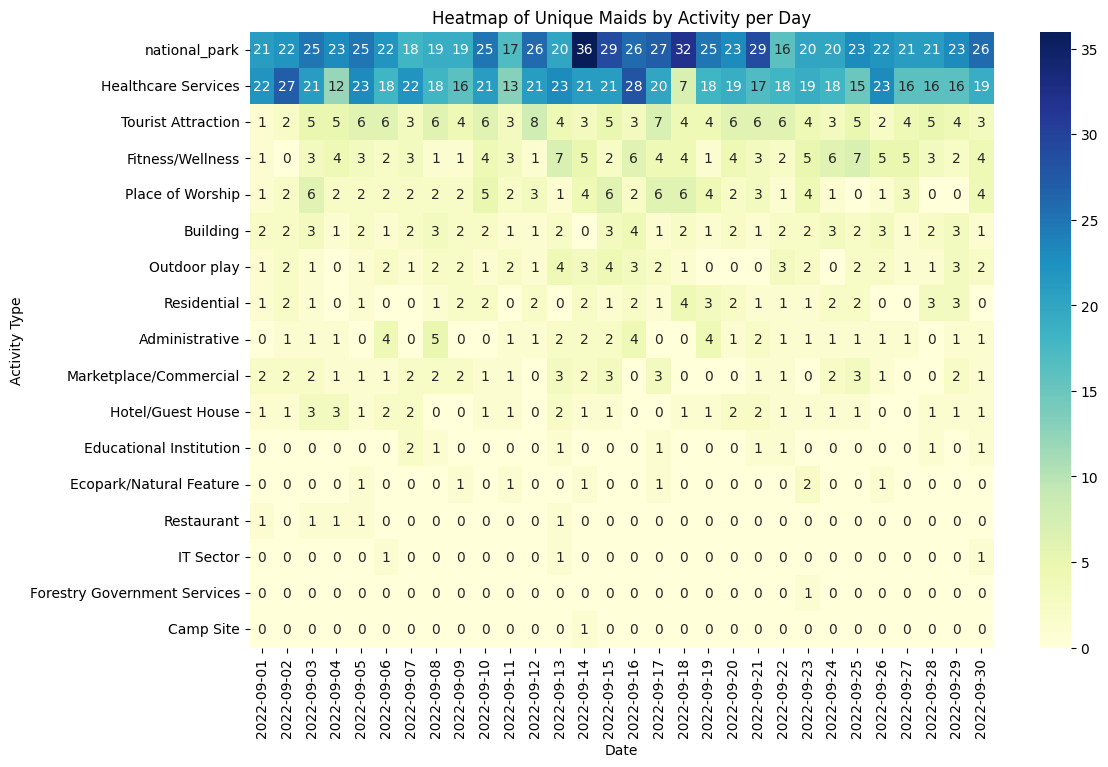

In [514]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'datetime' column to datetime format if it's not already
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])

# Extract the date from 'datetime'
df_merged['date'] = df_merged['datetime'].dt.date

# Exclude 'Road', 'Train', and 'Flight' activities
activities_to_exclude = ['Road', 'Train', 'Flight','']
filtered_df = df_merged[~df_merged['Activity_type'].isin(activities_to_exclude)]

# Group by 'date' and 'Activity_type' and calculate the number of unique 'maids'
activity_counts = filtered_df.groupby(['date', 'Activity_type'])['maid'].nunique().reset_index()

# Sort 'activity_counts' by 'date' and by total 'maid' count per 'Activity_type'
activity_counts['total_maid_count'] = activity_counts.groupby('Activity_type')['maid'].transform('sum')

# Sort 'Activity_type' by 'total_maid_count' in descending order
activity_counts.sort_values(['total_maid_count', 'date'], ascending=[False, True], inplace=True)

# Pivot the table to have 'date' as columns and 'Activity_type' as rows
activity_pivot = activity_counts.pivot(index='Activity_type', columns='date', values='maid')

# Replace NaNs with 0 (if desired) for plotting purposes
activity_pivot = activity_pivot.fillna(0)

# Sort the index (Activity_type) based on total 'maid' count in descending order
activity_pivot = activity_pivot.loc[activity_pivot.sum(axis=1).sort_values(ascending=False).index]

# Sort the columns (date) chronologically
activity_pivot = activity_pivot[sorted(activity_pivot.columns)]

# Plot the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(activity_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Unique Maids by Activity per Day')
plt.ylabel('Activity Type')
plt.xlabel('Date')
plt.show()

In [294]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.ticker as ticker

# Function to plot cumulative distance
def plot_activity_trace(df, prefix=''):
    """
    Plots the cumulative distance against cumulative time for each maid in the dataframe.

    Parameters:
    df (pd.DataFrame): DataFrame containing maid, datetime, distance, and path.
    """

    # Check and convert the datetime column if necessary
    if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
        df['datetime'] = pd.to_datetime(df['datetime'])

    # Plotting cumulative distance against cumulative time
    plt.figure(figsize=(18, 6))

    for maid, group in df.groupby('maid'):
        plt.plot(group['datetime'], group['distance'], marker='o', linestyle='-', label=maid)
        
        # Annotate each point with the corresponding path value
        for i, row in group.iterrows():
            plt.annotate(
                row['Activity_trace'], 
                (row['datetime'], row['distance']),
                textcoords="offset points", 
                xytext=(5, 5),  # Position of text relative to the point
                ha='left', 
                fontsize=6, 
                alpha=0.7,  # Make the text slightly transparent for clarity
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3')
            )

    plt.xlabel('Date')
    plt.ylabel('Distance (Kms)')

    # Adjusting the legend position and appearance
    plt.legend(
        loc='upper left',
        title='Maid ID',
        fancybox=True,
        framealpha=0.5,
        borderpad=1
    )

    plt.title(f'{prefix}Distance vs Time')

    # Set the x-axis major locator to day and format the dates
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator())  # Major ticks for each day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Set minor locator for hourly grid lines
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks for 2 hour

    # Set major ticks on the y-axis every 100 units and minor ticks every 50 units
    ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))  # Minor ticks for divisions of 50

    plt.xticks(rotation=45)

    # Enable grid for both major and minor ticks
    ax.grid(which='major', linestyle='--', linewidth=1.0)  # Regular grid for major ticks
    ax.grid(which='minor', linestyle=':', linewidth=0.5)   # Regular grid for minor ticks

    # Calculate the start of the day for the first datetime
    first_day_start = df['datetime'].min().normalize()

    # Create a date range with 12-hour frequency starting from first_day_start
    twelve_hour_ticks = pd.date_range(start=first_day_start, end=df['datetime'].max(), freq='12H')

    # Draw thicker lines at each 12-hour interval
    for dt in twelve_hour_ticks:
        ax.axvline(x=dt, linestyle='-', color='gray', linewidth=0.8, alpha=0.5)  # Thicker line for 12-hour grid

    plt.tight_layout()
    plt.show()


In [382]:
df_merged['maid'].nunique()

13934

In [378]:
df_merged['Activity_trace'].unique().tolist()

[nan,
 'Road',
 'national_park',
 'Guest House',
 'Historic Site',
 'Flight',
 'Residential',
 'Tourist Attraction',
 'Fitness Centre',
 'Healthcare Services',
 'Train',
 'Place of Worship',
 'Art',
 'Clinic',
 'Administrative',
 'Hotel',
 'Forestry Government Services',
 'Marketplace',
 'Sports Ground',
 'Park',
 'Building',
 'Commercial',
 'Wellness Centre',
 'Natural Feature',
 'Restaurant',
 'Ecopark',
 'Office',
 'Museum',
 'Educational Institution',
 'Camp Site']

In [487]:
# Count the non-null values in 'activity_trace' per 'maid'
valid_activity_counts = df_merged.groupby('maid')['Activity_trace'].count().reset_index()

# Rename the column for clarity
valid_activity_counts.columns = ['maid', 'valid_activity_count']
valid_activity_counts= valid_activity_counts.sort_values(by=['valid_activity_count'], ascending=True)
# Display the resulting DataFrame
print(valid_activity_counts[valid_activity_counts['valid_activity_count']>0].iloc[500:520])

                                       maid  valid_activity_count
8267   97f1deb1-2678-48ce-a948-d4deb6e5d425                    56
11620  d5d26c25-36c5-4992-a530-b2117f3df7af                    56
3242   3d331661-97d3-4b47-9b44-43e390074168                    56
9086   a742d99d-2445-492c-81a2-555d247ec177                    56
6089   70c36e54-4dc4-446d-b042-6264ebebdc5f                    56
4202   4d97cc8f-2d91-49b8-ac16-3fee6fadba2e                    56
6240   735575fb-7a3a-4e7a-bdce-a922e3f286c8                    56
1582   1d65a58f-426d-44ba-9132-a7f6529059b2                    56
9940   b66fa156-b379-4b28-a2a4-2801e9a06666                    56
1756   2099f3b2-1c4b-4c89-a61f-31c9376beb29                    56
9908   b5ea499b-027c-40c8-a853-a9bd1a90f288                    56
89     015e16d2-905d-427d-b3fc-1747c9c8151d                    56
5280   6189581d-7f12-410b-a62e-3ce3b5efb8ef                    56
1492   1b99b37f-b0b9-4694-bfe2-b229c0af4d3e                    56
7817   901

In [471]:
ids_with_no_activity= set(valid_activity_counts[valid_activity_counts['valid_activity_count']==0]['maid'].unique().tolist())

In [472]:
len(ids_with_no_activity)

12

In [474]:
df_merged = df_merged[~df_merged['maid'].isin(set(ids_with_no_activity))]
df_merged.shape
# df_merged['maid'].nunique()

(2792457, 14)

In [476]:
df_merged['Activity_trace'].replace(np.nan, '', inplace=True)

In [489]:
import pandas as pd

# Sample DataFrame
# df_merged = pd.DataFrame({...})

# Ensure 'Activity_trace' is treated as a string
df_merged['Activity_trace'] = df_merged['Activity_trace'].astype(str)

# Calculate the number of distinct 'Activity_trace' values per 'MAID'
distinct_activity_counts = df_merged.groupby('maid')['Activity_trace'].nunique()

# Calculate the number of non-empty 'Activity_trace' values per 'MAID'
non_empty_activity_counts = df_merged[df_merged['Activity_trace'] != ''].groupby('maid')['Activity_trace'].count()

# Combine these metrics into a new DataFrame
summary_df = pd.DataFrame({
    'distinct_activity_count': distinct_activity_counts,
    'non_empty_activity_count': non_empty_activity_counts
}).fillna(0)  # Fill NaN values with 0 for MAIDs with no non-empty values

# Sort by most distinct values first, then by most non-empty values
sorted_summary_df = summary_df.sort_values(
    by=['distinct_activity_count', 'non_empty_activity_count'],
    ascending=[False, False]
)

# Display sorted MAIDs and their metrics
print(sorted_summary_df)


                                      distinct_activity_count  \
maid                                                            
5bf4b2ca-ee63-4900-8b55-cd336b64540e                        6   
91ef84fa-f5f4-4f56-a3d1-45e080291c55                        5   
86ad273c-260a-4596-8648-ebfbb60ee60f                        5   
61df0e8b-43f5-43ab-8873-a2c07a8cda18                        5   
54049cb0-d0cf-44f4-b0e8-e0ff71fdc679                        5   
...                                                       ...   
446d529a-79eb-4e95-8197-a8b112aae589                        1   
b569bab2-0ce3-4ce4-9069-94841dc6b5f1                        1   
fa2d67f0-8db2-4b1a-bec6-a38811a21489                        1   
500c7187-7eea-4845-a9fa-51b5e1cfe7ce                        1   
005c1901-26ba-40e2-8b9f-11df29ae7fdd                        1   

                                      non_empty_activity_count  
maid                                                            
5bf4b2ca-ee63-4900-8b55-

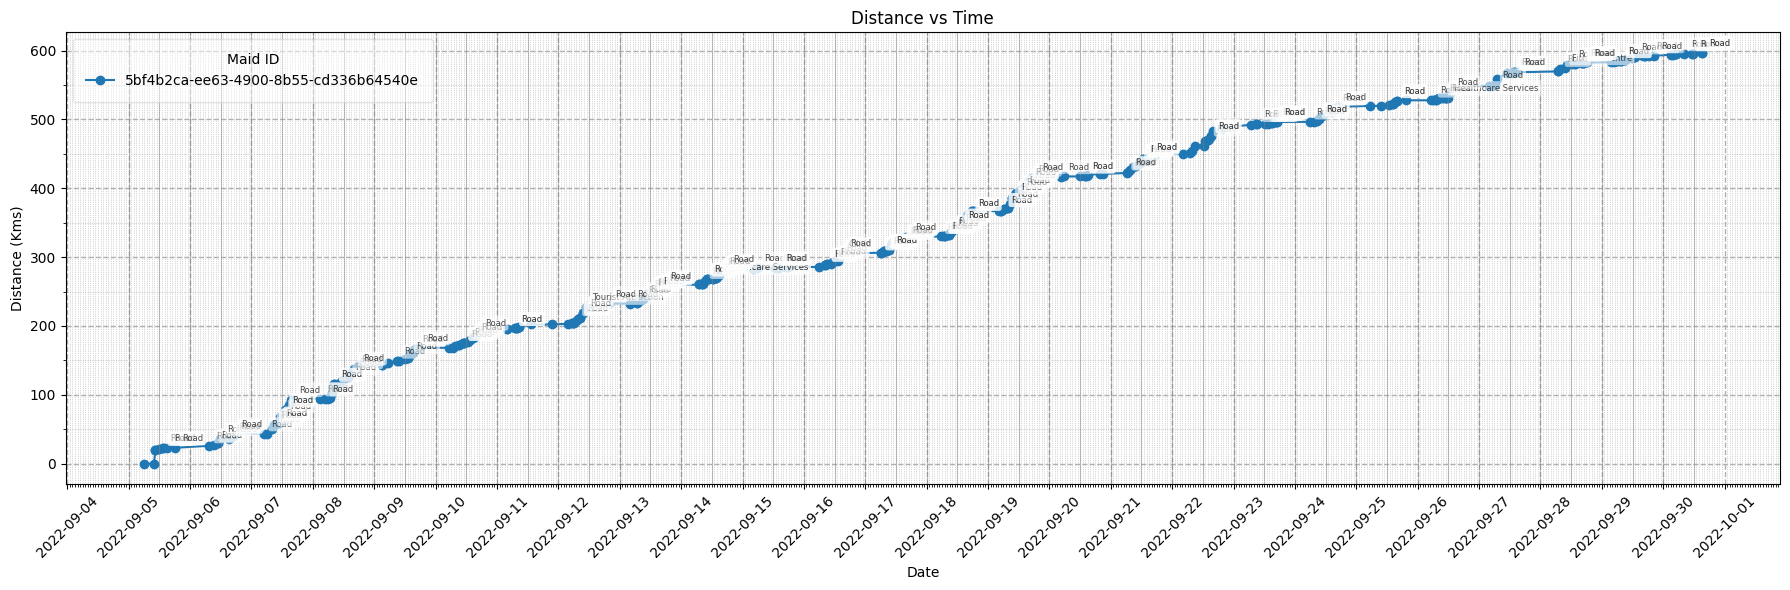

In [490]:
plot_activity_trace(df_merged[df_merged['maid']=='5bf4b2ca-ee63-4900-8b55-cd336b64540e'])

In [301]:
df_merged.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'place_name', 'Activity_trace', 'date'],
      dtype='object')

In [307]:
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime

def create_position_time_plots(df, save_path, shapefile_path, start_date='2022-09-01'):
    # Load shapefile using GeoPandas
    gdf = gpd.read_file(shapefile_path)

    # Convert datetime to pandas datetime
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Calculate time duration from a specific date
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    df['time_duration'] = (df['datetime'] - start_date).dt.total_seconds() / 3600  # in hours
    max_duration = df['time_duration'].max()

    # Normalize time_duration to [0, 1] for heatmap intensity
    df['heatmap_intensity'] = df['time_duration'] / max_duration

    # Calculate bounding box based on dataframe coordinates
    min_lat, max_lat = df['latitude'].min(), df['latitude'].max()
    min_lon, max_lon = df['longitude'].min(), df['longitude'].max()

    # Calculate center of the bounding box
    center_lat = (min_lat + max_lat) / 2
    center_lon = (min_lon + max_lon) / 2

    # Create the map centered around the bounding box
    m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    # Add GeoJSON layer
    folium.GeoJson(gdf.to_json(), name="geojson").add_to(m)

    # Fit the map to the bounding box
    m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

    # Define 12 colors for different days
    day_colors = ['#8B00FF', '#4B0082', '#0000FF', '#00BFFF', '#00FFFF', '#00FF00', 
                  '#ADFF2F', '#FFFF00', '#FFD700', '#FFA500', '#FF4500', '#FF0000']

    # Define gradient colors for lines based on speed
    def get_gradient_color(speed):
        if speed > 600:
            return 'maroon'
        elif speed > 500:
            return 'darkred'
        elif speed > 400:
            return 'red'
        elif speed > 300:
            return 'darkorange'
        elif speed > 200:
            return 'orange'
        elif speed > 100:
            return 'yellow'
        elif speed > 20:
            return 'lightgreen'
        else:
            return 'darkgreen'

    # Add lines connecting consecutive points with specific colors
    for i in range(len(df) - 1):
        point1 = (df.iloc[i]['latitude'], df.iloc[i]['longitude'])
        point2 = (df.iloc[i + 1]['latitude'], df.iloc[i + 1]['longitude'])

        # Determine color index based on datetime day
        day_index = (df.iloc[i]['datetime'] - start_date).days % 12
        color = day_colors[day_index]

        # Determine color for lines based on instantaneous speed
        speed = df.iloc[i + 1]['Velocity']
        line_color = get_gradient_color(speed)

        # Add markers with tooltips for each point
        tooltip1 = (
            f"Maid: {df.iloc[i + 1]['maid']}<br>"
            f"Date: {df.iloc[i]['datetime'].strftime('%Y-%m-%d %H:%M:%S')}<br>"
            f"Lat: {df.iloc[i]['latitude']}<br>"
            f"Lon: {df.iloc[i]['longitude']}<br>"
            f"Displacement: {df.iloc[i]['displacement']}<br>"
            f"Distance(km): {df.iloc[i]['distance']}<br>"
            f"Velocity: {df.iloc[i]['Velocity']}<br>"
            f"State: {df.iloc[i]['state']}<br>"
            f"District: {df.iloc[i]['district']}<br>"
            f"Road type: {df.iloc[i]['highway']}<br>"
            # f"Name Road: {df.iloc[i]['name_en_left']}<br>"
            f"Road Name: {df.iloc[i]['ref_old']}<br>"
            # f"Ref: {df.iloc[i]['ref']}<br>"
            f"Place Name: {df.iloc[i]['place_name']}<br>"
            f"Activity Trace: {df.iloc[i]['Activity_trace']}<br>"
            # f"Date Only: {df.iloc[i]['date']}"
        )

        folium.CircleMarker(
            location=point1,
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
            tooltip=tooltip1
        ).add_to(m)

        tooltip2 = (
            f"Maid: {df.iloc[i + 1]['maid']}<br>"
            f"Date: {df.iloc[i]['datetime'].strftime('%Y-%m-%d %H:%M:%S')}<br>"
            f"Lat: {df.iloc[i]['latitude']}<br>"
            f"Lon: {df.iloc[i]['longitude']}<br>"
            f"Displacement: {df.iloc[i]['displacement']}<br>"
            f"Distance(km): {df.iloc[i]['distance']}<br>"
            f"Velocity: {df.iloc[i]['Velocity']}<br>"
            f"State: {df.iloc[i]['state']}<br>"
            f"District: {df.iloc[i]['district']}<br>"
            f"Road type: {df.iloc[i]['highway']}<br>"
            # f"Name Road: {df.iloc[i]['name_en_left']}<br>"
            f"Road Name: {df.iloc[i]['ref_old']}<br>"
            # f"Ref: {df.iloc[i]['ref']}<br>"
            f"Place Name: {df.iloc[i]['place_name']}<br>"
            f"Activity Trace: {df.iloc[i]['Activity_trace']}<br>"
            # f"Date Only: {df.iloc[i]['date']}"
        )
        folium.CircleMarker(
            location=point2,
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=1,
            tooltip=tooltip2
        ).add_to(m)

        # Add polyline connecting consecutive points
        folium.PolyLine(locations=[point1, point2], color=line_color, weight=2.5, opacity=1).add_to(m)

    # Add starting and ending points with star markers
    start_point = (df.iloc[0]['latitude'], df.iloc[0]['longitude'])
    end_point = (df.iloc[-1]['latitude'], df.iloc[-1]['longitude'])
    folium.Marker(
        location=start_point,
        icon=folium.Icon(color='silver', icon='star'),
        tooltip='Start Point'
    ).add_to(m)
    folium.Marker(
        location=end_point,
        icon=folium.Icon(color='black', icon='star'),
        tooltip='End Point'
    ).add_to(m)

    # Save map to an HTML file
    m.save(save_path)

# Example usage:
# create_position_time_plots(df, 'bounded_traces_map.html', shapefile_path)

In [313]:
import os
dir_path = r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Position_time_plots'
shapefile_path = r'C:\Users\User\Downloads\Mobility_traces_new_data_code\GeoJSON files\India\Indian_States.shp'

# for file in files_paths:
#     df= pd.read_csv(file)
#     key = file.split('Uttarakhand_')[1].split('.csv')[0]
save_path = os.path.join(dir_path,f'Activity_Position_time_plot_ad124e67-8fed-4647-804b-a7b1dbcc06d8.html')
create_position_time_plots(df_merged[df_merged['maid']=='ad124e67-8fed-4647-804b-a7b1dbcc06d8'], save_path, shapefile_path)

In [326]:
pd.set_option('display.max_columns', 35)

In [438]:
df_complete = pd.read_csv(r'C:\Users\User\Downloads\mobility_traces_complete_data\Acitivity and travelling stats\Final_activity trace_for_Uttarakhand_complete_info_25082024.csv') 

In [439]:
df_complete.columns

Index(['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway', 'name_en_left', 'ref_old',
       'ref', 'int_ref', 'distance_to_road(metres)', 'road_activity',
       'distance_from_location(m)', 'name_point_shp', 'Activity_point_shp',
       'All_activities_point_shp', 'geometry', 'name_polygon',
       'All_activities_polygon', 'Activity_polygon',
       'Activity_trace_with_road_journey', 'name_airport_boundary',
       'name_rail', 'dist_to_rail(m)', 'name_airport_point',
       'dist_to_airport(m)', 'train_activity', 'flight_activity', 'place_name',
       'Activity_trace_bkp', 'Activity_trace_latest_orig_bkp',
       'Activity_trace'],
      dtype='object')

In [404]:
df_complete = df_complete[['maid', 'datetime', 'latitude', 'longitude', 'displacement', 'distance',
       'Velocity', 'state', 'district', 'highway','name_en_left', 'ref_old',
       'ref','distance_to_road(metres)','name_rail', 'dist_to_rail(m)', 'name_airport_point',
       'dist_to_airport(m)','name_point_shp','distance_from_location(m)', 'place_name', 'Activity_trace'] ]

In [440]:
df_complete[df_complete['maid']=='ad124e67-8fed-4647-804b-a7b1dbcc06d8']

maid             datetime  latitude  \
1899353  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 05:54:43   30.2888   
1899354  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 11:31:35   30.2888   
1899355  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 13:04:05   30.2890   
1899356  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 13:04:06   30.2891   
1899357  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-01 14:44:48   30.2883   
...                                       ...                  ...       ...   
1899502  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 05:56:45   30.2888   
1899503  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 08:31:26   30.2885   
1899504  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 13:14:28   30.2885   
1899505  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 13:45:30   30.2888   
1899506  ad124e67-8fed-4647-804b-a7b1dbcc06d8  2022-09-30 15:09:09   30.2888   

         longitude  displacement     distance   Velocity        state  \
1899353    79.1581      0.000000     0.000000   0.000000  Uttarakhand   
1899354    79.1581      0.000000     0.000000   0.000000  Uttarakhand   
1899355    79.1579      0.029383     0.029383   0.019059  Uttarakhand   
1899356    79.1579      0.011119     0.040502  40.030174  Uttarakhand   
1899357    79.1578      0.089473     0.129975   0.053310  Uttarakhand   
...            ...           ...          ...        ...          ...   
1899502    79.1582      0.009602  4950.813110   0.006096  Uttarakhand   
1899503    79.1580      0.038491  4950.851600   0.014930  Uttarakhand   
1899504    79.1580      0.000000  4950.851600   0.000000  Uttarakhand   
1899505    79.1580      0.033358  4950.884959   0.064495  Uttarakhand   
1899506    79.1580      0.000000  4950.884959   0.000000  Uttarakhand   

        district highway name_en_left ref_old  ref int_ref  \
1899353  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899354  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899355  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899356  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899357  Chamoli   trunk          NaN    NH58  NH7     NaN   
...          ...     ...          ...     ...  ...     ...   
1899502  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899503  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899504  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899505  Chamoli   trunk          NaN    NH58  NH7     NaN   
1899506  Chamoli   trunk          NaN    NH58  NH7     NaN   

         distance_to_road(metres) road_activity  distance_from_location(m)  \
1899353                 10.199067          Road                 866.361251   
1899354                 10.199067          Road                 866.361251   
1899355                  3.620076          Road                 895.953771   
1899356                 15.359273           NaN                 908.583199   
1899357                 82.759570           NaN                 810.348525   
...                           ...           ...                        ...   
1899502                  5.390028          Road                 864.389697   
1899503                 49.888173           NaN                 830.578186   
1899504                 49.888173           NaN                 830.578186   
1899505                 15.008107           NaN                 868.471028   
1899506                 15.008107           NaN                 868.471028   

         ... All_activities_point_shp  \
1899353  ...                      NaN   
1899354  ...                      NaN   
1899355  ...                      NaN   
1899356  ...                      NaN   
1899357  ...                      NaN   
...      ...                      ...   
1899502  ...                      NaN   
1899503  ...                      NaN   
1899504  ...                      NaN   
1899505  ...                      NaN   
1899506  ...                      NaN   

                            